# Experiments on "Maximizing the Spread of Influence through a Social Network"

In [3]:
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

from InfluenceDiffusion import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading Data

Here we import the data from [2016 Democratic National Committee email leak](http://networkrepository.com/email-dnc.php),
 an email communication network. Nodes in the network correspond to persons in the
 dataset. A directed edge in the dataset denotes that a person has sent an email to
  another person. The nature of emailing results in a directed multigraph.
  Here we ignore the time variable.

In [4]:
multigraph, directed_graph = read_data()

## Three Diffusion Models

In this paper, we have three types of influence diffusion models: linear threshold model (node-specific threshold),
independent cascade model (dynamic cascade), and "weighted" cascade model.

By specifying the argument _mode_ in function *begin_diffusion*, we can choose the
influence model to experiment. Here let node 1 be the initial size-1 set to target.
And the uniform probability in independent cascade model for edges is set to 0.01.

In [4]:
result = begin_diffusion(initial_set={1},
                underlying_graph=directed_graph,
                max_iter=100,
                mode='linear threshold')
print("# final active nodes: ", result[1])

MODE: linear threshold - EARLY TERMINATION
# final active nodes:  98


In [5]:
result = begin_diffusion(initial_set={1},
                underlying_graph=directed_graph,
                max_iter=100,
                mode='independent cascade',
                         p_cascade=0.01)
print("# final active nodes: ", result[1])

MODE: independent cascade - EARLY TERMINATION
# final active nodes:  184


In [6]:
result = begin_diffusion(initial_set={1},
                underlying_graph=directed_graph,
                max_iter=100,
                mode='weighted cascade')
print("# final active nodes: ", result[1])

MODE: weighted cascade - EARLY TERMINATION
# final active nodes:  84


## Hill-climbing Greedy & 3 Baselines

In this paper, the hill-climbing greedy algorithm is proposed to generate a nearly-optimal
 size-k target set. And 3 baselines are compared for performance: random draw, degree-based
 heuristic, and closeness-centrality-based heuristic. Here we experiment with size 5.
 For the hill-climbing greedy, we set the underlying diffusion model as the linear threshold model.

In [5]:
target_set1 = random_draw(multigraph, k=5)
target_set2 = degree_heuristic(multigraph, k=5)
target_set3 = centrality_heuristic(multigraph, k=5)
target_set4 = greedy_initial_set = hill_climbing_greedy(directed_graph, k=5, max_iter=300, p_cascade=0.01, mode='linear threshold')

print(target_set1)
print(target_set2)
print(target_set3)
print(target_set4)

{1898, 1035, 173, 1530, 1853}
{1669, 1258, 1839, 1874, 1144}
{453, 1669, 1159, 1906, 1874}
{707, 1253, 1670, 1159, 319}


## Experiments on Algorithms Performance

We simulate the process 10000 times for each targeted set,
re-choosing thresholds or edge outcomes pseudo-randomly from
[0, 1] every time. We iterate the size of initial target set from 1 to 30.

### Results on Linear Threshold Model

In [8]:
temp_list1 = []
temp_list2 = []
temp_list3 = []
temp_list4 = []
for k in range(100):
    target_set1 = random_draw(multigraph, k=k+1)
    target_set2 = degree_heuristic(multigraph, k=k+1)
    target_set3 = centrality_heuristic(multigraph, k=k+1)
    temp_list12 = []
    temp_list22 = []
    temp_list32 = []
    temp_list42 = []
    for l in range(500):
        _, final_size1 = begin_diffusion(initial_set=target_set1,
                                     underlying_graph=directed_graph,
                                     max_iter=500,
                                     mode='linear threshold')
        _, final_size2 = begin_diffusion(initial_set=target_set2,
                                     underlying_graph=directed_graph,
                                     max_iter=500,
                                     mode='linear threshold')
        _, final_size3 = begin_diffusion(initial_set=target_set3,
                                     underlying_graph=directed_graph,
                                     max_iter=500,
                                     mode='linear threshold')
        temp_list12.append(final_size1)
        temp_list22.append(final_size2)
        temp_list32.append(final_size3)
    temp_list1.append(temp_list12)
    temp_list2.append(temp_list22)
    temp_list3.append(temp_list32)

In [9]:
S1 = np.array(temp_list1)
S2 = np.array(temp_list2)
S3 = np.array(temp_list3)

mu1 = S1.mean(axis=1)
sigma1 = S1.std(axis=1)

mu2 = S2.mean(axis=1)
sigma2 = S2.std(axis=1)

mu3 = S3.mean(axis=1)
sigma3 = S3.std(axis=1)

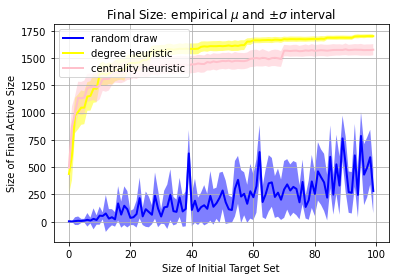

In [10]:
fig, ax = plt.subplots(1)

ax.plot(np.arange(100), mu1, lw=2, label='random draw', color='blue')
ax.fill_between(np.arange(100), mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)

ax.plot(np.arange(100), mu2, lw=2, label='degree heuristic', color='yellow')
ax.fill_between(np.arange(100), mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)

ax.plot(np.arange(100), mu3, lw=2, label='centrality heuristic', color='pink')
ax.fill_between(np.arange(100), mu3+sigma3, mu3-sigma3, facecolor='pink', alpha=0.5)

ax.set_title(r'Final Size: empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Size of Initial Target Set')
ax.set_ylabel('Size of Final Active Size')
ax.grid()

### Results on Independent Cascade Model

### Results on Weighted Cascade Model